In [15]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import random
from sklearn.model_selection import train_test_split
from pathlib import Path


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
import joblib
a = joblib.load('./pickle/dataset_test.pkl')
b = joblib.load('./pickle/dataset_train.pkl')
c = joblib.load('./pickle/validation_dataset.pkl')

a.to_csv('dataset_test.csv')
b.to_csv('dataset_train.csv')
c.to_csv('validation_dataset.csv')

In [18]:
data = [
    pd.read_csv(p, sep='|', header=0, index_col=None)
    for p in tqdm(list(Path('.', 'data', 'LDS2', 'train').iterdir()))
]

data_validation = [
    pd.read_csv(p, sep='|', header=0, index_col=None)
    for p in tqdm(list(Path('.', 'data', 'LDS2', 'valid').iterdir()))
]

data_ffill = [d.ffill() for d in tqdm(data)]
data_validation_ffill = [d.ffill() for d in tqdm(data_validation)]
data_ewm = [
    pd.concat([d.ffill(), d.drop('SepsisLabel', axis='columns').ewm(alpha=0.25).mean().add_prefix('ewm_')], axis='columns')
    for d in tqdm(data)
]
data_validation_ewm = [
    pd.concat([d.ffill(), d.drop('SepsisLabel', axis='columns').ewm(alpha=0.25).mean().add_prefix('ewm_')], axis='columns')
    for d in tqdm(data_validation)
]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

KeyError: "['SepsisLabel'] not found in axis"

In [ ]:
# drop_features = ['Unit1', 'Unit2', 'ICULOS',] #'ewm_Unit1', 'ewm_Unit2', 'ewm_ICULOS'] #, 'HospAdmTime', 'ICULOS', 'Age']
# random.seed(100)
# np.random.seed(100)

data_stratify = pd.Series([1 in d.SepsisLabel.values for i, d in enumerate(data_ewm)])
data_train, data_test = train_test_split(data_ewm, stratify=data_stratify, shuffle=True)

dataset_train = pd.concat(data_train, axis='rows').sample(frac=1)
dataset_test = pd.concat(data_test, axis='rows').sample(frac=1)

In [3]:
dataset_train.head()

NameError: name 'dataset_train' is not defined

### Accessibility

In [56]:
df_access = pd.read_excel('./accessibility metrics.xlsx')

level3_metrics = df_access[df_access['accessibility'] < 4]['Metric'].to_list()
# keep_cols = level3_metrics.append('SepsisLabel')

level3_metrics_ewm = ["ewm_" + s for s in level3_metrics]

all_level3_cols = level3_metrics + level3_metrics_ewm + ['SepsisLabel']

# keep_cols = level3_metrics + ['SepsisLabel']

dataset_train = dataset_train[all_level3_cols]
dataset_test = dataset_test[all_level3_cols]


In [197]:
dataset_train = pd.read_csv('./data/LDS2/train/dataset_train.csv')
dataset_test = pd.read_csv('./data/LDS2/train/dataset_test.csv')
dataset_train = dataset_train.drop('Unnamed: 0', axis=1)
dataset_test = dataset_test.drop('Unnamed: 0', axis=1)

In [199]:
dataset_train = dataset_train.drop('ewm_Gender', axis=1)
dataset_train = dataset_train.drop('ewm_Age', axis=1)
dataset_test = dataset_test.drop('ewm_Gender', axis=1)
dataset_test = dataset_test.drop('ewm_Age', axis=1)

In [200]:
X_train = dataset_train.drop('SepsisLabel', axis='columns')
y_train = dataset_train['SepsisLabel']

X_test = dataset_test.drop('SepsisLabel', axis='columns')
y_test = dataset_test['SepsisLabel']

In [201]:
X_train.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Creatinine,Glucose,Lactate,Potassium,Hct,Hgb,WBC,Platelets,Age,Gender,ewm_HR,ewm_O2Sat,ewm_Temp,ewm_SBP,ewm_MAP,ewm_DBP,ewm_Resp,ewm_Creatinine,ewm_Glucose,ewm_Lactate,ewm_Potassium,ewm_Hct,ewm_Hgb,ewm_WBC,ewm_Platelets
0,71.0,95.0,0.00,131.5,58.00,44.0,26.0,1.777369e-11,0.0,0.000000e+00,0.0,0.0,0.0,1.064860e-21,1.000685e-09,76.54,0.0,74.920227,94.195006,10.315589,136.996010,67.223133,45.428481,24.103773,0.003338,4.358012,0.000000,0.026471,0.330028,0.117243,0.067589,1.209608
1,82.0,94.0,36.50,100.0,78.00,0.0,22.0,2.002422e-04,0.0,0.000000e+00,0.0,0.0,0.0,8.698582e-05,4.335491e-02,66.98,1.0,77.030537,52.827811,14.844759,97.785833,71.956315,0.974108,21.888060,0.025821,1.996678,0.000000,0.627458,0.695930,0.230684,0.404089,30.571162
2,102.0,98.0,0.00,137.0,93.00,72.0,15.0,1.853304e-08,0.0,1.868382e-11,0.0,0.0,0.0,1.021520e-02,4.763987e-04,41.61,1.0,93.503214,98.505508,5.545890,125.692965,85.502599,67.679221,18.057693,0.056376,8.697948,0.006450,0.273824,2.335560,0.797312,1.461263,26.998148
3,84.0,100.0,0.00,116.0,70.00,50.0,18.0,2.134664e-02,0.0,9.787598e-15,0.0,0.0,0.0,4.013603e-03,3.965221e-03,71.74,1.0,85.855012,96.583595,16.735737,127.800291,78.206804,54.964031,17.106720,0.194188,19.565372,0.000578,0.552455,3.589245,1.212513,1.454697,16.224220
4,76.0,100.0,36.17,159.0,81.67,0.0,10.0,8.501355e-10,0.0,0.000000e+00,0.0,0.0,0.0,4.940448e-07,9.938770e-09,69.65,0.0,78.764178,95.220795,12.573258,150.079016,81.835530,0.000000,13.444515,0.036003,2.584084,0.000000,0.117933,1.076407,0.331270,0.850601,9.634557


In [137]:
indices = X_train['Gender'] == 1
X_train_m = X_train[indices]
y_train_m = y_train[indices]

indices2 = X_test['Gender'] == 1
X_test_m = X_test[indices2]
y_test_m = y_test[indices2]

indices = X_train['Gender'] == 0
X_train_f = X_train[indices]
y_train_f = y_train[indices]

indices2 = X_test['Gender'] == 0
X_test_f = X_test[indices2]
y_test_f = y_test[indices2]

In [241]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

sample_weight = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train,
)

params = {
    'objective': 'reg:logistic', 
    'n_estimators': 3,
}

model = XGBClassifier(**params, use_label_encoder=False)
model.fit(
    X_train, y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='auc',
    sample_weight=sample_weight,
)

[0]	validation_0-auc:0.73812	validation_1-auc:0.68299
[1]	validation_0-auc:0.75999	validation_1-auc:0.69221
[2]	validation_0-auc:0.76881	validation_1-auc:0.69038


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3, n_jobs=8, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

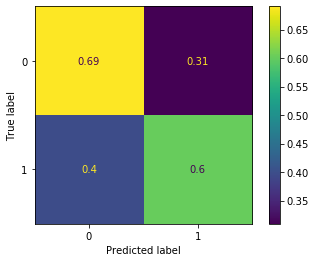

In [242]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, normalize='true')

In [255]:
X_test.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Creatinine',
       'Glucose', 'Lactate', 'Potassium', 'Hct', 'Hgb', 'WBC', 'Platelets',
       'Age', 'Gender', 'ewm_HR', 'ewm_O2Sat', 'ewm_Temp', 'ewm_SBP',
       'ewm_MAP', 'ewm_DBP', 'ewm_Resp', 'ewm_Creatinine', 'ewm_Glucose',
       'ewm_Lactate', 'ewm_Potassium', 'ewm_Hct', 'ewm_Hgb', 'ewm_WBC',
       'ewm_Platelets'],
      dtype='object')

In [210]:
validation_dataset = pd.read_csv('./data/LDS2/valid/validation_dataset.csv')
# validation_dataset = pd.concat(data_validation_ewm, axis='rows')
X_valid = validation_dataset.drop('SepsisLabel', axis='columns')
y_valid = validation_dataset['SepsisLabel']

In [212]:
X_valid = X_valid[level3_metrics + level3_metrics_ewm]

In [213]:
X_valid = X_valid.drop('ewm_Gender', axis=1)
X_valid = X_valid.drop('ewm_Age', axis=1)

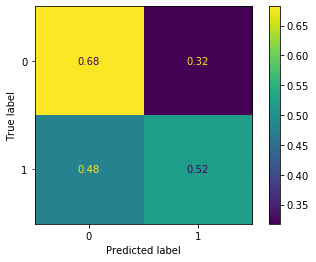

In [244]:
plot_confusion_matrix(model, X_valid, y_valid, normalize='true')

In [195]:
X_train.shape, X_valid.shape, X_test.shape

((414351, 34), (117904, 34), (138752, 34))

In [264]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train, sample_weight=sample_weight)

LogisticRegression(max_iter=2000)

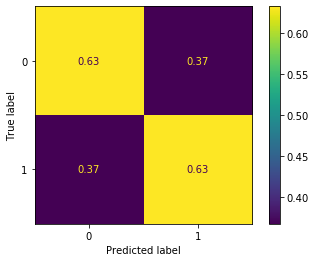

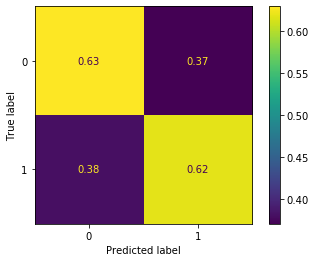

In [265]:
plot_confusion_matrix(lr, X_test, y_test, normalize='true')
plot_confusion_matrix(lr, X_valid, y_valid, normalize='true')